## Network architecture

The task that the network must perform is to remember and recall a set of associative pairings without modifying its structure. For example, if we present the network with (0, 1) and (2, 3) then presenting 0 to the network should cause it to respond with 1, presenting 1 should cause it to respond with 0, presenting 2 should cause it to respond with 3, and presenting 3 should cause it to respond with 2.

We first explore a very simple manifestation of the network, called Network0, with properties of individual neurons defined phenomenologically. Later on we will show how the network can be constructed from standard integrate-and-fire neurons.

### Structure

The network architecture comprises an *item* layer and a *memory* layer. Each unit in the item layer corresponds to an item that can potentially be part of an associative pair (1, 2, 3, 4, etc.). The memory units are randomly connected to the item units, with all connections bidirectional. In Network0 there are no item-item or memory-memory connections.

### Dynamics

Network0 operates in discrete time steps. Inputs to a unit in the network can consist of specific external drives (e.g., an experimenter presenting a specific item pairing), global controls (homogeneous inputs to all units in a layer), upstream inputs (inputs from active units connected to the unit in question), and in the case of the memory units lingering hyperexcitability (see below).

#### Item unit dynamics

In Network0 item units can be either active or inactive, and we allow at most 2 units to be active at a single time step. If no item unit receives any positive input, then no item units will become active. If only 1 item unit receives positive input, only that item unit will become active. If more than 1 item unit receives positive input, then the two item units receiving the highest inputs will become active.

#### Memory unit dynamics

In Network0 the memory units can be either active, inactive, or hyperexcitable, and there is no limit to the number of active or hyperexcitable memory units. An inactive memory unit becomes active if it receives at least 2 inputs, but a hyperexcitable memory unit requires only 1 input to become active (since hyperexcitability acts like an additional input). A memory unit becomes and remains hyperexcitable immediately after it becomes active. For example, if two item units become active at time step 0, then all of the memory units that connect to both of them will become active on time step 1, and they will remain hyperexcitable for time steps 2 and greater.

## Stimulation protocol

To test the network's ability to remember and recall pairwise associations, we present it with the following external drives and control signals:

In the *storage phase* we first stimulate two preselected item units (e.g., 0-1), which causes those item units to become active. This is shown in the first four red regions in **Figure 1**. For the next two time steps we inhibit all the item units to prevent reverberatory activity between the item and memory layer. This is indicated by the blue regions in **Figure 1**. In the first of these two time steps, the memory units connected to both item units will become active, and in the second of these two time steps, those memory units will become hyperexcitable. We then repeat this procedure for a specified number of associative pairings. Since one memory unit can connect to many item units, there may be overlap in the sets of memory units activated by each pairing.

In the *recall phase* we probe the network by first stimulating one item in one pairing. This is shown in the later red regions in **Figure 1**. We then wait two time steps for the signal to propagate first to the memory layer and then back to the item layer. The recall is successful if in the second time step both the originally stimulated item and its pair become active. We then inhibit the item layer for two more time steps (blue regions in **Figure 1**) to reset the network for the next recall probe.

In **Figure 1** we probe each item in each pair.

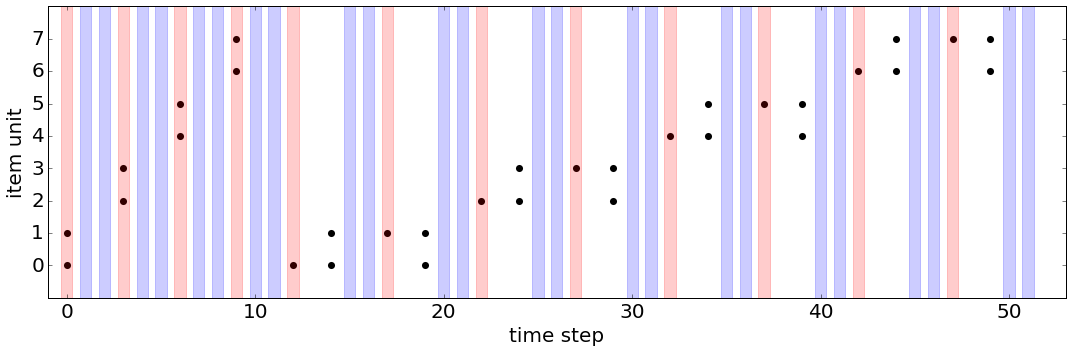

In [27]:
%matplotlib inline
from figures.demos_basic import single_trial

f = single_trial(
    SEED=0,  # random number generator seed
    N_ITEM_UNITS=100,  # number of item units
    N_MEMORY_UNITS=500,  # number of memory units
    P_CXN=0.2,  # probaibility of connection between item and memory unit
    N_PAIRS=4,  # number of pairs/associations to remember
)

### Figure 1: Demonstration of short-term associative recall in Network0
This figure depicts the item unit activations resulting from a storage phase (0 <= t <= 11) and recall phase (t >= 12) in Network0, the simplest manifestation of our short-term associative memory network. The network correctly recalls all presented associations. Network parameters are shown above the plot. Memory unit activations are not shown here.